<a href="https://colab.research.google.com/github/ariadnadelgado/Portafolio/blob/main/ariadna_delgado_tarea_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib scikit-learn


Saving macrotrendsapp.xlsx to macrotrendsapp (2).xlsx
Saving macrotrendsgoogle.xlsx to macrotrendsgoogle (2).xlsx
Saving oilprices.xlsx to oilprices (2).xlsx
Google grado 1 polinomio:  
-0.5528 x + 8.947e+08
Apple grado 1 polinomio:  
0.08114 x + 2.332e+08
WTI grado 1 polinomio:  
nan x + nan
Google grado 2 polinomio:            2
1.908e-09 x - 5.913 x + 4.598e+09
Apple grado 2 polinomio:             2
-1.162e-09 x + 2.477 x - 8.194e+08
WTI grado 2 polinomio:      2
nan x + nan x + nan
Google grado 3 polinomio:             3             2
-3.737e-18 x + 1.766e-08 x - 27.82 x + 1.465e+10
Apple grado 3 polinomio:             3            2
-1.608e-18 x + 3.81e-09 x - 2.196 x + 4.748e+08
WTI grado 3 polinomio:      3       2
nan x + nan x + nan x + nan


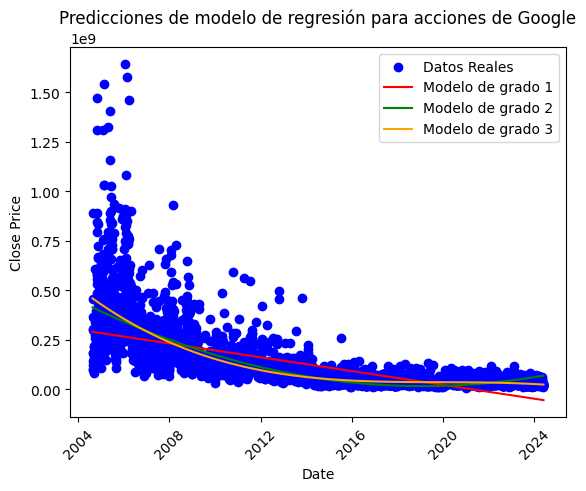

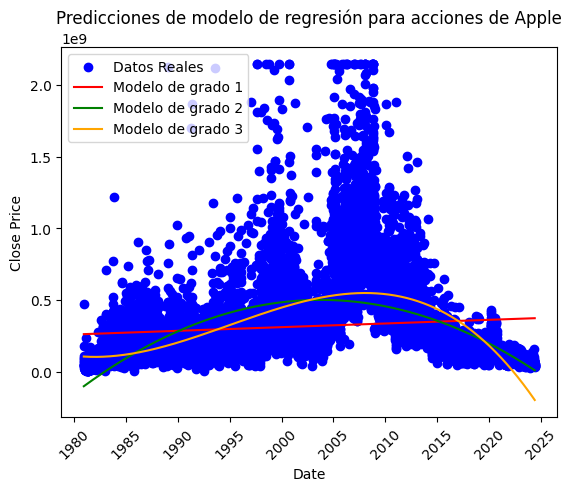

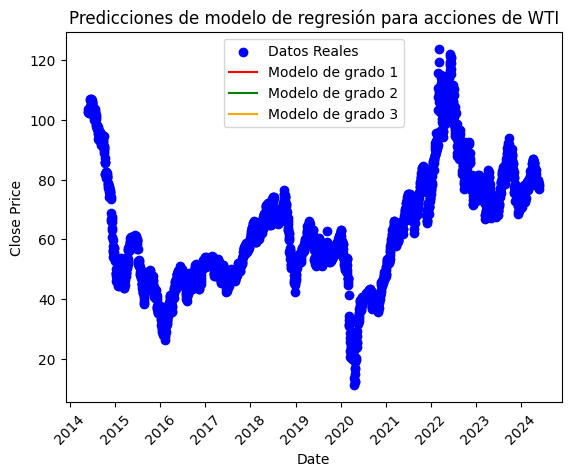

In [ ]:
# Primero se importan las librerias necesarias
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from google.colab import files

# Cargar archivos de Excel
uploaded = files.upload()

# Leer los datos desde los archivos subidos
df_apple = pd.read_excel('macrotrendsapp.xlsx')
df_google = pd.read_excel('macrotrendsgoogle.xlsx')
df_wti = pd.read_excel('oilprices.xlsx')

# Convertir la columna de fechas a tipo datetime
for df in [df_apple, df_google, df_wti]:
    df['date'] = pd.to_datetime(df['date'])

# Convertir las fechas a valores numéricos en segundos para evitar overflow
for df in [df_apple, df_google, df_wti]:
    df['date_numeric'] = df['date'].astype(np.int64) // 10**9  # Convertir a segundos

# Asegurarse de que la columna 'value' esté limpia
df_wti = df_wti.rename(columns=lambda x: x.strip())  # Eliminar espacios en los nombres de las columnas
df_wti['cost'] = df_wti['value'].astype(float)

# Función para crear y devolver un modelo polinómico ajustado
def polyfit_and_poly1d(x, y, degree):
    coefficients = np.polyfit(x, y, degree)
    return np.poly1d(coefficients), coefficients

# Creación de los modelos de regresión polinómica de grado 1, 2 y 3 para cada conjunto de datos
poly_fits = {}
degrees = [1, 2, 3]

for degree in degrees:
    poly_fits[f'google_{degree}'], coeff_google = polyfit_and_poly1d(df_google['date_numeric'], df_google['volume'], degree)
    poly_fits[f'apple_{degree}'], coeff_apple = polyfit_and_poly1d(df_apple['date_numeric'], df_apple['volume'], degree)
    poly_fits[f'wti_{degree}'], coeff_wti = polyfit_and_poly1d(df_wti['date_numeric'], df_wti['cost'], degree)
    # Imprimir los coeficientes de los polinomios
    print(f'Google grado {degree} polinomio: {np.poly1d(coeff_google)}')
    print(f'Apple grado {degree} polinomio: {np.poly1d(coeff_apple)}')
    print(f'WTI grado {degree} polinomio: {np.poly1d(coeff_wti)}')

# Función para graficar los datos reales y las predicciones
def plot_predictions(df, x_col, y_col, label_y, title, poly_fits, degree_colors):
    plt.scatter(df[x_col], df[y_col], color='blue', label='Datos Reales')
    for degree, color in degree_colors.items():
        plt.plot(df[x_col], poly_fits[degree](df[x_col + '_numeric']), color=color, label=f'Modelo de grado {degree}')
    plt.xlabel('Date')
    plt.ylabel(label_y)
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

# Colores asignados para cada grado de modelo
degree_colors = {1: 'red', 2: 'green', 3: 'orange'}

# Visualización de datos reales y de predicciones para Google
plot_predictions(df_google, 'date', 'volume', 'Close Price', 'Predicciones de modelo de regresión para acciones de Google',
                 {1: poly_fits['google_1'], 2: poly_fits['google_2'], 3: poly_fits['google_3']}, degree_colors)

# Visualización de datos reales y de predicciones para Apple
plot_predictions(df_apple, 'date', 'volume', 'Close Price', 'Predicciones de modelo de regresión para acciones de Apple',
                 {1: poly_fits['apple_1'], 2: poly_fits['apple_2'], 3: poly_fits['apple_3']}, degree_colors)

# Visualización de datos reales y de predicciones para WTI
plot_predictions(df_wti, 'date', 'cost', 'Close Price', 'Predicciones de modelo de regresión para acciones de WTI',
                 {1: poly_fits['wti_1'], 2: poly_fits['wti_2'], 3: poly_fits['wti_3']}, degree_colors)
